___

# Exercise, Part 1.  

The following sections describe a set of exercises to be completed in this practical. In your report you should state how you have achieved a solution, including description or drawings of FSTs, and listings of FST operations. All relevant files can be found in: **/home/wjb31/MLSALT/MLSALT3/practical/files/** .

In [1]:
# Add the OpenFST Python Extensions to your path
import sys
sys.path.append('/home/wjb31//src/openfst//openfst-1.6.3/INSTALL_DIR/lib/python2.7/site-packages/')
sys.path.append('/home/wjb31//src/openfst//specializer-master/')
sys.path.append('/home/wjb31/MLSALT/util/python/')
#sys.path.append('/home/yw440/MLSALT3/practical/files')
import pywrapfst as fst
import specializer
import utilfst
import math
import string

# Question 1

1. Given the alphabet $L = \{a, b, c, A, B, C, \mbox{⟨space⟩}\}$, create an automaton that:
    * (a) Accepts a letter in $L$ (including $\mbox{<space>}$).
    * (b) Accepts a single space.
    * (c) Accepts a capitalized word (where a word is a string of letters in L excluding space and a capitalized word has its initial letter uppercase and remaining letters lowercase)
    * (d) Accepts a word containing the letter a.
    

### Q1, (a)

In [3]:
L_ST = fst.SymbolTable()       # create symbol table
L_ST.add_symbol('<epsilon>')
L_ST.add_symbol('a')
L_ST.add_symbol('b')
L_ST.add_symbol('c')
L_ST.add_symbol('A')
L_ST.add_symbol('B')
L_ST.add_symbol('C')
L_ST.add_symbol('<space>')

7

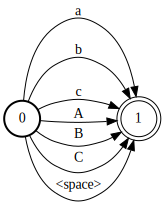

In [4]:
compiler = fst.Compiler(isymbols=L_ST, osymbols=L_ST, keep_isymbols=True, keep_osymbols=True)
print >> compiler, '0 1 a a'
print >> compiler, '0 1 b b'
print >> compiler, '0 1 c c'
print >> compiler, '0 1 A A'
print >> compiler, '0 1 B B'
print >> compiler, '0 1 C C'
print >> compiler, '0 1 <space> <space>'
print >> compiler, '1'
q1a = compiler.compile(); q1a

The automaton accepts a letter from a alphabet L including <space>.

### Q1. (b)

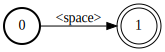

In [8]:
del compiler
compiler = fst.Compiler(isymbols=L_ST, keep_isymbols=True, acceptor=True)
print >> compiler, '0 1 <space>'
print >> compiler, '1'
q1b = compiler.compile(); q1b


The automaton only accepts a single space.

### Q1.(c)

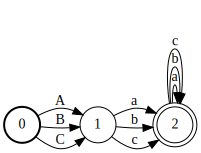

In [9]:
del compiler
compiler = fst.Compiler(isymbols=L_ST, keep_isymbols=True, acceptor=True)
print >> compiler, '0 1 A'
print >> compiler, '0 1 B'
print >> compiler, '0 1 C'
print >> compiler, '1 2 a'
print >> compiler, '1 2 b'
print >> compiler, '1 2 c'
print >> compiler, '2 2 a'
print >> compiler, '2 2 b'
print >> compiler, '2 2 c'
print >> compiler, '2'
q1c = compiler.compile(); q1c

The automaton accepts a capitalised word. It is assumed that a capitalised word has at least two letters with the first letter being uppercase and the rest lowercase.

### Q1.(d)

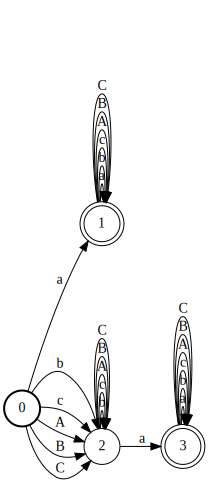

In [10]:
del compiler
compiler = fst.Compiler(isymbols=L_ST, keep_isymbols=True, acceptor=True)
print >> compiler, '0 1 a'
print >> compiler, '1 1 a'
print >> compiler, '1 1 b'
print >> compiler, '1 1 c'
print >> compiler, '1 1 A'
print >> compiler, '1 1 B'
print >> compiler, '1 1 C'
print >> compiler, '1'
print >> compiler, '0 2 b'
print >> compiler, '0 2 c'
print >> compiler, '0 2 A'
print >> compiler, '0 2 B'
print >> compiler, '0 2 C'
print >> compiler, '2 2 b'
print >> compiler, '2 2 c'
print >> compiler, '2 2 A'
print >> compiler, '2 2 B'
print >> compiler, '2 2 C'
print >> compiler, '2 3 a'
print >> compiler, '3 3 a'
print >> compiler, '3 3 b'
print >> compiler, '3 3 c'
print >> compiler, '3 3 A'
print >> compiler, '3 3 B'
print >> compiler, '3 3 C'
print >> compiler, '3'
q1d = compiler.compile(); q1d

A word is assumed to have any number of letters of either uppercase or lowercase. The forllowing automaton is after applying for epsilon removal, determinization and minimization.

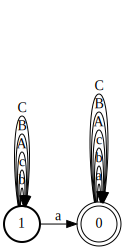

In [11]:
fst.determinize(q1d.rmepsilon()).minimize()

## Question 2

2. Q2. Using the automata in Question 1 as the building blocks, use appropriate FST operations on
them to create an automaton that:
    * (a) Accepts zero or more capitalized words followed by spaces. 
    * (b) Accepts a word beginning or ending in a capitalized letter. 
    * (c) Accepts a word that is capitalized and contains the letter a. 
    * (d) Accepts a word that is capitalized or does not contain an a.
    * (e) Accepts a word that is capitalized or does not contain an a without using the *union* operation
    
    For each case, give the number of states and arcs before and after applying epsilon removal, determinization and minimization to the resulting automata.

In each case, an automaton is created using blocks from the previous quesiotn. Then, epsilon removal, determinization and minimization are applied to the resulting automaton. The process is refered to as 'minimize' in this report.

### Q2. (a)

In [12]:
def num_arcs(f):
    return sum(f.num_arcs(s) for s in f.states())

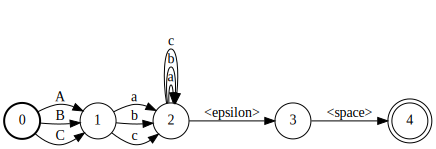

In [13]:
spaces = q1b.copy()
word_space = q1c.copy().concat(q1b); word_space

The transducer accepts spaces or capitalised words followed by spaces, which is implemented using union. Capitalised words followed by spaces is created by concatenating acceptor for capitalized word and space, which is the above automaton. The final transducer is closed to accept a number of capitalised words followed by spaces.

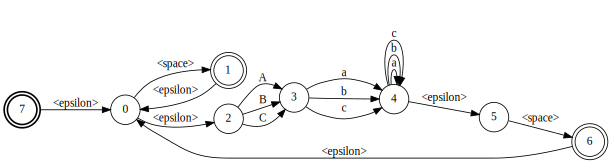

In [14]:
q2a = spaces.copy().union(word_space).closure(); q2a  #complete automata

Minimize the whole transducer.

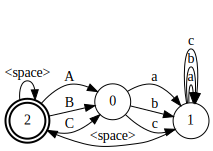

In [15]:
minimize_q2a = fst.determinize(q2a.copy().rmepsilon()).minimize(); minimize_q2a

### Q2.(b)

There are three types of words: 
    * 1) betwen and end with captal letters;
    * 2) only begin with capital leters; 
    * 3) only end with capital letters

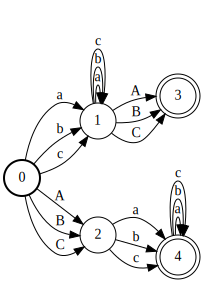

In [17]:
reverse_q1c = fst.reverse(q1c.copy()).rmepsilon(); reverse_q1c     # words end in Capital letters
q2b = q1c.copy().union(reverse_q1c); q2b
minimize_q2b = fst.determinize(q2b.rmepsilon()).minimize(); minimize_q2b

The automaton is a union of two transducers: one accpts capitalised words, the other accepts the reverse of capitalised words. In this case, assume that there's only one uppercase letter in a word.

### Q3.(c)

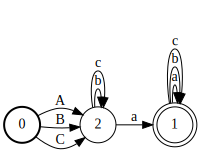

In [19]:
q2c = fst.intersect(q1c, q1d); q2c  # transducer that accepts a capitalized word and contains letter a
minimize_q2c = fst.determinize(q2c.rmepsilon()).minimize(); minimize_q2c

A automaton that accepts a capitalised word that a word containing letter 'a' needs to satisfy two conditions at the same time. Therefore, the automaton is the intersection of capitalised words and words that contains letter 'a'.

### Q2, (d)

6 17


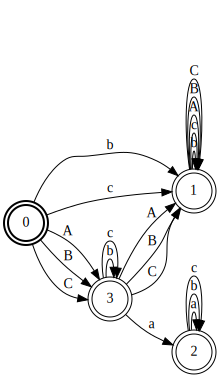

In [20]:
all_words = fst.difference(q1a,q1b).closure()
not_a = fst.difference(all_words, fst.determinize(q1d).minimize()); not_a
q2d = q1c.copy().union(not_a);q2d
print q2d.num_states(), num_arcs(q2d)
minimize_q2d = fst.determinize(q2d.rmepsilon()).minimize(); minimize_q2d

In [21]:
print minimize_q2d.num_states(), num_arcs(minimize_q2d)

4 19


First, an automaton that accpts all words from the alphabet is created by applying closure on the automaton that accepts all letters in the alphabet in q1a. Then automaton accepts words not containing letter 'a' is produced by the difference between automata that accepts all words and that only accepts word containing letter 'a'. Finally, the union of the two is created that accepts capitalised words or words containing letter 'a'.

### Q2, (e)

8 23


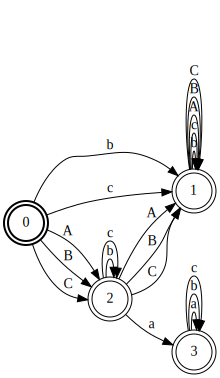

In [23]:
not_capital = fst.difference(all_words, q1c); not_capital
temp = fst.determinize(fst.intersect(not_capital, q1d).rmepsilon()).minimize(); temp
q2e = fst.difference(all_words, temp); q2e
print q2e.num_states(), num_arcs(q2e)
minimize_q2e = fst.determinize(q2e.rmepsilon()).minimize(); minimize_q2e

In [24]:
print minimize_q2e.num_states(), num_arcs(minimize_q2e)

4 19


# Question 3

3. Q3 Given the alphabet $L = \{a, b, \ldots, z, \mbox{⟨space⟩},.,,\}$ (includes period and comma), for which a symbol table file can be found in **table4.txt**:
    * (a) Create a transducer that implements the *rot13* cipher: $a\rightarrow n,  b\rightarrow o, \ldots, m\rightarrow z, n\rightarrow a , o \rightarrow b , ... , z \rightarrow m$ 
    * (b) Encode and decode the message ’my secret message’ (assume ⟨space⟩ $\rightarrow$ ⟨space⟩, . $\rightarrow$ . and , $\rightarrow$ ,).
    * (c) We wish to decipher the message that can be found in the file **4.encoded1.fst** knowing that in order to do so, we must simultaneously allow two transductions, namely *rot13* and *rot16* (a $\rightarrow$ q , b $\rightarrow$ r , ...), so that a can either encode an original `n` or `q`. Build a suitable decoding transducer, apply it to the encoded message and examine the resulting FST (after projecting onto the output symbols). How many states and arcs does it contain? How many states and arcs after removing epsilons, determinizing and minimizing it? How many distinct strings does it represent?
    * (d) We now know that the original text belongs to Charles Dickens’ *David Copperfield* novel. Accordingly, a language model has been implemented as an unweighted automaton that accepts any sentence contained in this novel. This can be found in **4.lm.fst**
Compose your resulting FST from question (c) with this language model. What was the original text?
    * (e) Similarly, a second text belonging to the same novel has been encoded in the file **4.encoded2.fst** by applying the *rot13* cipher and allowing some pairs of consecutive letters to be swapped (excluding ⟨space⟩ or punctuation). Build a suitable decoding transducer2, apply it to the encoded message and compose your answer with the language model. What was the original text?

### Q3.(a)

In [29]:
table4_ST = fst.SymbolTable.read_text('/homes/yw440/Michaelmas/MLSALT3/practical/files/table4.txt')
del compiler
compiler = fst.Compiler(isymbols=table4_ST, osymbols=table4_ST, keep_isymbols=True, keep_osymbols=True)
file = open('rot13.txt')
for line in file:
    compiler.write(line)
file.close()
rot13_cipher = compiler.compile(); #rot13_cipher

The rot13 cipher is where original letters are the input symbols of the transducer and cipher code are the output of the transducer. 

### Q3.(b)

In [30]:
del compiler
compiler = fst.Compiler(isymbols=table4_ST, osymbols=table4_ST, keep_isymbols=True, keep_osymbols=True)
file = open('message.txt')
for line in file:
    compiler.write(line)
file.close()
message = compiler.compile(); message

In [31]:
print 'Original message: ', utilfst.printstrings(message, nshortest=1, syms=table4_ST, weight=False)
encoded_message = fst.compose(message,  rot13_cipher.closure().rmepsilon()).project(project_output=True); encoded_message
print 'Encoded message: ', utilfst.printstrings(encoded_message, nshortest=3, syms=table4_ST, weight=False)
decoded_message = fst.compose( encoded_message, rot13_cipher.closure().rmepsilon()).project(project_output=True)
print 'Decoded message: ', utilfst.printstrings(decoded_message, nshortest=3, syms=table4_ST, weight=False)

Original message:  ['m y <space> s e c r e t <space> m e s s a g e']
Encoded message:  ['z l <space> f r p e r g <space> z r f f n t r']
Decoded message:  ['m y <space> s e c r e t <space> m e s s a g e']


### Q3.(c)

In [33]:
encoded1 = fst.Fst.read("/homes/yw440/Michaelmas/MLSALT3/practical/files/4.encoded1.fst", fst_type='vector')
del compiler
compiler = fst.Compiler(isymbols=table4_ST, osymbols=table4_ST, keep_isymbols=True, keep_osymbols=True)
file = open('rot16.txt')
for line in file:
    compiler.write(line)
file.close()
rot16_cipher = compiler.compile();# rot16_cipher

In [34]:
rot13_rot16_cipher = rot13_cipher.copy().union(rot16_cipher).closure()
decoded1 = fst.compose(encoded1, rot13_rot16_cipher).project(project_output=True); decoded1
utilfst.printstrings(decoded1, nshortest=2, syms=table4_ST, weight=False)

['t h b q h b r <space> f <space> s h x i i <space> q u r n <space> o u q <space> q o <space> b b <space> q h b <space> h b r o <space> o f <space> m v <space> o t n <space> i f f b , <space> o r <space> t h b q h b r <space> q h x q <space> s q x q f o n <space> t f i i <space> b b <space> h b i d <space> b v <space> x n v b o d v <space> b i s b , <space> q h b s b <space> p x g b s <space> m u s q <space> s h o t . <space> q o <space> b b g f n <space> m v <space> i f f b <space> t f q h <space> q h b <space> b b g f n n f n g <space> o f <space> m v <space> i f f b , <space> f <space> r b c o r d <space> q h x q <space> f <space> t x s <space> b o r n <space> x s <space> f <space> h x v b <space> b b b n <space> f n f o r m b d <space> x n d <space> b b i f b v b <space> o n <space> x <space> f r f d x v , <space> x q <space> q t b i v b <space> o c i o c k <space> x q <space> n f g h q . <space> f q <space> t x s <space> r b m x r k b d <space> q h x q <space> q h b <space> c i o 

In [35]:
print 'It contains:', decoded1.num_states(), 'states, ', num_arcs(decoded1), 'arcs'

It contains: 1462 states,  2556 arcs


In [36]:
minimize_decoded1 = fst.determinize(decoded1.rmepsilon()).minimize(); minimize_decoded1
print 'It contains: ', minimize_decoded1.num_states(), 'states, ', num_arcs(minimize_decoded1), 'arcs after minimization.'

It contains:  366 states,  649 arcs after minimization.


In [37]:
#number of distinct paths
decoded1_log = fst.arcmap(fst.arcmap(minimize_decoded1, map_type='rmweight'),map_type='to_log')
print fst.shortestdistance(decoded1_log, reverse=True)[0]

-196.85347


The number of distinct strings is 3*10^85

### Q3.(d)

In [41]:
lm = fst.Fst.read("/homes/yw440/Michaelmas/MLSALT3/practical/files/4.lm.fst", fst_type='vector')
original_text = fst.compose(minimize_decoded1, lm).project(project_output=True); original_text
print utilfst.printstrings(original_text, nshortest=5, syms=table4_ST, weight=False)

['w h e t h e r <space> i <space> s h a l l <space> t u r n <space> o u t <space> t o <space> b e <space> t h e <space> h e r o <space> o f <space> m y <space> o w n <space> l i f e , <space> o r <space> w h e t h e r <space> t h a t <space> s t a t i o n <space> w i l l <space> b e <space> h e l d <space> b y <space> a n y b o d y <space> e l s e , <space> t h e s e <space> p a g e s <space> m u s t <space> s h o w . <space> t o <space> b e g i n <space> m y <space> l i f e <space> w i t h <space> t h e <space> b e g i n n i n g <space> o f <space> m y <space> l i f e , <space> i <space> r e c o r d <space> t h a t <space> i <space> w a s <space> b o r n <space> a s <space> i <space> h a v e <space> b e e n <space> i n f o r m e d <space> a n d <space> b e l i e v e <space> o n <space> a <space> f r i d a y , <space> a t <space> t w e l v e <space> o c l o c k <space> a t <space> n i g h t . <space> i t <space> w a s <space> r e m a r k e d <space> t h a t <space> t h e <space> c l o 

The resulting transducer in c is conposed with language model of Charles Dickens' David Copperfield novel. The result and original text are shown above and below.

### Q3.(e)
(e) Similarly, a second text belonging to the same novel has been encoded in the file **4.encoded2.fst** by applying the *rot13* cipher and allowing some pairs of consecutive letters to be swapped (excluding ⟨space⟩ or punctuation). Build a suitable decoding transducer2, apply it to the encoded message and compose your answer with the language model. What was the original text?

In [43]:
encoded2 = fst.Fst.read("/homes/yw440/Michaelmas/MLSALT3/practical/files/4.encoded2.fst", fst_type='vector')
decoded2 = fst.compose(encoded2, rot13_cipher).project(project_output=True)
#print utilfst.printstrings(encoded2, nshortest=5, syms=table4_ST, weight=False)
print utilfst.printstrings(decoded2, nshortest=5, syms=table4_ST, weight=False)

['i <space> o d n t <space> n k w o <space> h w o <space> l o n g <space> e w <space> w e r e <space> g o i n g , <space> a n d <space> t o <space> h t s i <space> h o r u <space> i <space> n k o w <space> a s <space> i l t t l e <space> w h e r e <space> e w <space> w e t n . <space> e p r h p a s <space> i t <space> w s a <space> e n a r <space> u g i d l f r o d . <space> p e h r a p s <space> s o e m <space> a r b a i n a n i g h t <space> m g a i i c a n , <space> p o n e d e <space> p u <space> t h e <space> l p a c e <space> f o r <space> h t e <space> d a y , <space> a n d <space> s h u t <space> t i <space> u p <space> f r o <space> v e r e <space> h w e n <space> w e <space> c a e m <space> a a w y . <space> t i <space> w a s <space> a <space> g e r n e <space> p s o t , <space> n o <space> a <space> h l i l , <space> c r a p e e t d <space> i w t h <space> s f o t <space> u t f r . <space> h t r e e <space> w e e r <space> s h a y d <space> r t e e s , <space> a n d <space> 

In [44]:
weightOne = fst.Weight.One('tropical')
punc = [',', '.','' ,';', '?', '!','<space>']
decoded2_swap = decoded2.copy()
for state in decoded2_swap.states():
    for arc in decoded2.arcs(state):
        current_state = state       
        next_state = arc.nextstate
        for next_arc in decoded2.arcs(next_state):
            next_arc
        if state > 0:                #copy previous arc
            if previous_arc.ilabel not in punc:
                decoded2_swap.add_arc(current_state, fst.Arc(previous_arc.ilabel, previous_arc.olabel,weightOne,next_state))
        if next_arc.ilabel not in punc:
            decoded2_swap.add_arc(current_state, fst.Arc(next_arc.ilabel, next_arc.olabel, weightOne,next_state))    #copy next arc
        previous_arc = arc
        #print 'current state',state, next_state, 'previous', previous_arc.ilabel, previous_arc.olabel,'current', arc.ilabel, arc.olabel, 'next', next_arc.ilabel, next_arc.olabel
            

In [45]:
original_text2 = fst.compose(decoded2_swap, lm).project(project_output=True); original_text2
utilfst.printstrings(original_text2, nshortest=1, syms=table4_ST, weight=False)

['i <space> d o n t <space> k n o w <space> h o w <space> l o n g <space> w e <space> w e r e <space> g o i n g , <space> a n d <space> t o <space> t h i s <space> h o u r <space> i <space> k n o w <space> a s <space> l i t t l e <space> w h e r e <space> w e <space> w e n t . . p e r h a p s <space> i t <space> w a s <space> n e a r <space> g u i l d f o r d . . p e r h a p s <space> s o m e <space> a r a b i a n n i g h t <space> m a g i c i a n , <space> o p e n e d <space> u p <space> t h e <space> p l a c e <space> f o r <space> t h e <space> d a y , <space> a n d <space> s h u t <space> i t <space> u p <space> f o r <space> e v e r <space> w h e n <space> w e <space> c a m e <space> a w a y . . i t <space> w a s <space> a <space> g r e e n <space> s p o t , <space> o n <space> a <space> h i l l , <space> c a r p e t e d <space> w i t h <space> s o f t <space> t u r f . . t h e r e <space> w e r e <space> s h a d y <space> t r e e s , <space> a n d <space> h e a t h e r , <space> 

# Question 4

4. Q4.Using the shortest distance operation, and without using the n-best option of the shortestpath or printstrings functions, count the number of distinct paths in the in the acceptor  **/home/wjb31/MLSALT/MLSALT3/practical/files/countme.fst **.  Give the steps you use and explain why your procedure works.

In [47]:
countme = fst.Fst.read("/homes/yw440/Michaelmas/MLSALT3/practical/files/countme.fst", fst_type='vector')
countme_log = fst.arcmap(fst.arcmap(countme, map_type='rmweight'),map_type='to_log')
print fst.shortestdistance(countme_log, reverse=True)[0]

-13.0964966


In log semiring, the shortest distance can tell the number of distinct paths within the transducer. If a transducer has n unique paths with zero weights, the weight of any path is zero. The shortest distance from initial state to any final state is the negative log of the number of unique paths. Therefore, the nuber of unique paths is exponential of - shortest distance. In this case 

In [51]:
import numpy as np
np.exp(13.0964966)

487232.4508526004